####필요한 라이브러리 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSL/24-2/보건복지부_시군구별 치매현황_20231231 (1).csv', encoding='euc-kr')
df.head()

,연도,시도,시군구,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2020,전국,전국,전체,60~64세,3804709.5,23350.26,0.61,4062.95,9667.01,6001.02,3619.29,0.00,0.00,23350.26,0.61,0.00,0.00,568975.71,14.95
1,2020,전국,전국,전체,65~69세,2635592.0,36620.52,1.39,6371.97,15160.90,9411.47,5676.18,34204.14,1.30,0.00,0.00,2416.38,0.09,472079.05,17.91
2,2020,전국,전국,전체,70~74세,2000708.5,77236.58,3.86,13439.16,31975.94,19849.80,11971.67,74101.52,3.70,1868.56,0.09,1279.71,0.06,432263.10,21.61
3,2020,전국,전국,전체,75~79세,1602662.5,189626.57,11.83,32995.02,78505.40,48734.03,29392.12,79081.82,4.93,36835.05,2.30,73617.65,4.59,238681.35,14.89
4,2020,전국,전국,전체,80~84세,1110911.5,232892.50,20.96,40523.30,96417.50,59853.37,36098.34,182257.11,16.41,8518.04,0.77,42047.60,3.78,530714.37,47.77


In [ ]:
df.columns

Index(['연도', '시도', '시군구', '성별', '연령별', '노인인구수', '치매환자수', '치매환자유병률', '최경도 환자',
       '경도 환자', '중등도 환자', '중증 환자', '알츠하이머 환자수', '알츠하이머 환자유병률', '혈관성치매 환자수',
       '혈관성치매 환자유병률', '기타 환자환자수', '기타 환자유병률', '경도인지장애 환자수', '경도인지장애 환자유병률'],
      dtype='object')

In [ ]:
df_2023 = df[df['연도']== 2023]

In [ ]:
df_2022 = df[df['연도']== 2022]

In [ ]:
df_2021 = df[df['연도']== 2021]

In [ ]:
df_2020 = df[df['연도']== 2020]

#### 성별에 따른 나이대 별 치매환자유병률 비교(전국, 2023)




In [ ]:
#2023년도 성별에 따른 나이별 치매환자유병률
data = df_2023[df_2023['시군구'] == '전국']
data= data[(data['성별'] == '남') | (data['성별'] == '여')]
data= data[['성별','연령별', '치매환자유병률']]
data_sex= data[(data['연령별'] != '60세이상') & (data['연령별'] != '65세이상')]
data_sex


,성별,연령별,치매환자유병률
20420,남,60~64세,1.13
20421,남,65~69세,1.85
20422,남,70~74세,4.66
20423,남,75~79세,9.23
20424,남,80~84세,17.09
20425,남,85세이상,53.99
20428,여,60~64세,0.11
20429,여,65~69세,0.96
20430,여,70~74세,3.16
20431,여,75~79세,13.76


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
# 나눔 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

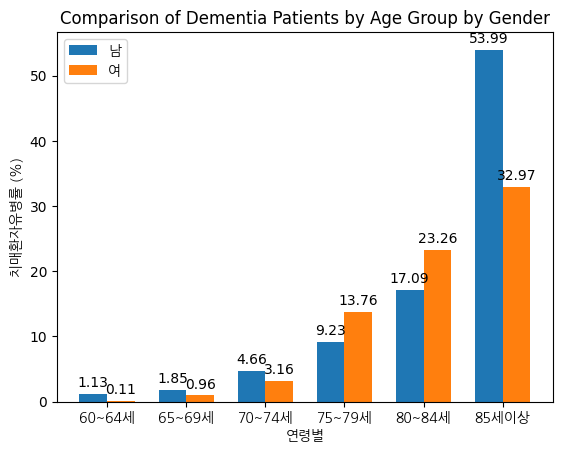

In [ ]:

# 남성과 여성의 데이터 분리
df_male = data_sex[data_sex['성별'] == '남']
df_female = data_sex[data_sex['성별'] == '여']

# 막대그래프 그리기
x = np.arange(len(df_male['연령별']))  # x 축 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, df_male['치매환자유병률'], width, label='남')
bars2 = ax.bar(x + width/2, df_female['치매환자유병률'], width, label='여')

# 그래프에 레이블 추가
ax.set_xlabel('연령별',fontproperties=font_prop)
ax.set_ylabel('치매환자유병률 (%)', fontproperties=font_prop)
ax.set_title('Comparison of Dementia Patients by Age Group by Gender')
ax.set_xticks(x)
ax.set_xticklabels(df_male['연령별'], fontproperties=font_prop)
ax.legend(prop=font_prop)

# 그래프에 값 레이블 추가
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# 그래프 보여주기
plt.show()

75-84세 사이에는 여성의 치매비율이 높지만, 그 외의 연령대에서는 남성의 치매 비율이 높은 것을 확인.

####나이대 별 치매환자유병률 비교(전국, 2023)


In [ ]:
data = df_2023[df_2023['시군구'] == '전국']
data= data[(data['성별'] == '전체')]
data= data[['성별','연령별', '치매환자유병률']]
data_sex_total= data[(data['연령별'] != '60세이상') & (data['연령별'] != '65세이상')]
data_sex_total =data_sex_total.reset_index()
data_sex_total

,index,성별,연령별,치매환자유병률
0,20412,전체,60~64세,0.62
1,20413,전체,65~69세,1.39
2,20414,전체,70~74세,3.86
3,20415,전체,75~79세,11.76
4,20416,전체,80~84세,20.87
5,20417,전체,85세이상,39.06


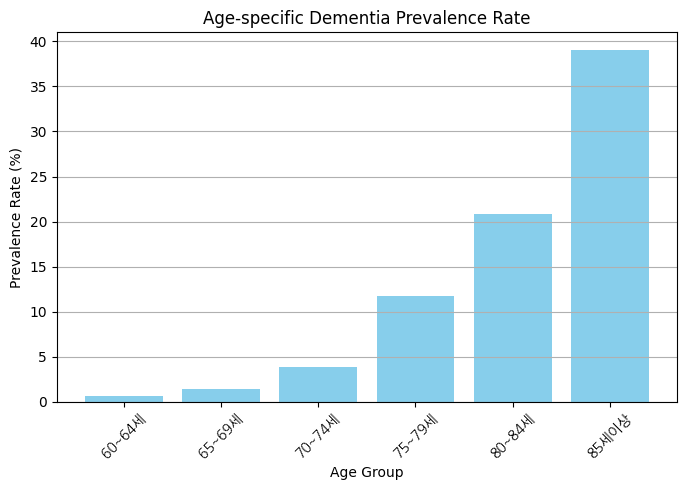

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 4.8))
plt.bar(data_sex_total['연령별'], data_sex_total['치매환자유병률'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Prevalence Rate (%)')
plt.title('Age-specific Dementia Prevalence Rate')
plt.xticks(rotation=45, fontproperties=font_prop)
plt.grid(axis='y')

# 그래프 보여주기
plt.show()

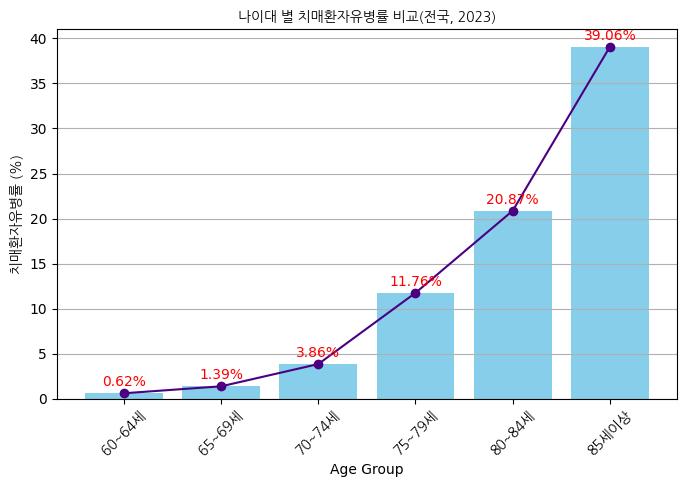

In [ ]:
# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 4.8))

# 막대 그래프
ax.bar(data_sex_total['연령별'], data_sex_total['치매환자유병률'], color='skyblue', label='치매환자유병률 (Bar)')
ax.set_xlabel('Age Group')
ax.set_ylabel('치매환자유병률 (%)', fontproperties=font_prop)
ax.set_title('나이대 별 치매환자유병률 비교(전국, 2023)', fontproperties=font_prop)
ax.set_xticks(range(len(data_sex_total['연령별'])))
ax.set_xticklabels(data_sex_total['연령별'], rotation=45, fontproperties=font_prop)

# 꺾은선 그래프
ax.plot(data_sex_total['연령별'], data_sex_total['치매환자유병률'], color='indigo', marker='o', label='치매환자유병률 (Line)')

# 꺾은선 그래프에 수치 표시
for i, value in enumerate(data_sex_total['치매환자유병률']):
    ax.annotate(f'{value}%', (i, value), textcoords="offset points", xytext=(0,5), ha='center', color='red')


# 그리드 추가
ax.grid(axis='y')

# 그래프 보여주기
plt.show()

In [ ]:
data_sex_total['치매환자유병률']

,치매환자유병률
20412,0.62
20413,1.39
20414,3.86
20415,11.76
20416,20.87
20417,39.06


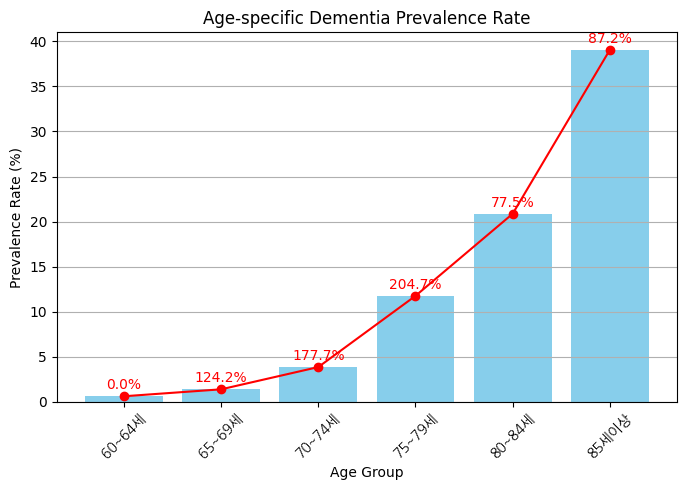

In [ ]:
# 증가율 계산
increase_rate = [0]  # 첫 번째 데이터 포인트의 증가율은 0으로 설정
for i in range(1, len(data_sex_total['치매환자유병률'])):
    prev_value = data_sex_total['치매환자유병률'][i - 1]
    curr_value = data_sex_total['치매환자유병률'][i]
    rate = ((curr_value - prev_value) / prev_value) * 100
    increase_rate.append(rate)

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 4.8))

# 막대 그래프
ax.bar(data_sex_total['연령별'], data_sex_total['치매환자유병률'], color='skyblue', label='치매환자유병률 (Bar)')
ax.set_xlabel('Age Group')
ax.set_ylabel('치매환자유병률', fontproperties=font_prop)
ax.set_title('Age-specific Dementia Prevalence Rate')
ax.set_xticks(range(len(data_sex_total['연령별'])))
ax.set_xticklabels(data_sex_total['연령별'], rotation=45,fontproperties=font_prop)

# 꺾은선 그래프
ax.plot(data_sex_total['연령별'], data_sex_total['치매환자유병률'], color='red', marker='o', label='치매환자유병률 (Line)')

# 꺾은선 그래프에 증가율 표시
for i, (value, rate) in enumerate(zip(data_sex_total['치매환자유병률'], increase_rate)):
    ax.annotate(f'{rate:.1f}%', (i, value), textcoords="offset points", xytext=(0,5), ha='center', color='red')

# 그리드 추가
ax.grid(axis='y')

# 그래프 보여주기
plt.show()

#### 시군구별 치매환자유병률 비교(2023)

In [ ]:
strict = ['전국','서울특별시','부산광역시','대구광역시','인천광역시'
,'광주광역시','대전광역시','울산광역시','세종특별자치시'
,'경기도','강원도','충청북도','충청남도','전라북도'
,'전라남도','경상북도','경상남도','제주특별자치도']

In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2023_city = df_2023[df_2023['시군구'].isin(strict)]
df_2023_city = df_2023_city.reset_index(drop=True)
df_2023_city

,연도,시도,시군구,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2023,전국,전국,전체,60~64세,4190183.5,25799.18,0.62,4489.06,10680.86,6630.39,3998.87,NaN,NaN,NaN,NaN,NaN,NaN,628366.56,15.00
1,2023,전국,전국,전체,65~69세,3282269.5,45700.98,1.39,7951.97,18920.21,11745.15,7083.65,NaN,NaN,NaN,NaN,NaN,NaN,586163.95,17.86
2,2023,전국,전국,전체,70~74세,2229036.5,86119.78,3.86,14984.84,35653.59,22132.78,13348.57,NaN,NaN,NaN,NaN,NaN,NaN,481897.33,21.62
3,2023,전국,전국,전체,75~79세,1653502.5,194410.43,11.76,33827.41,80485.92,49963.48,30133.62,NaN,NaN,NaN,NaN,NaN,NaN,242442.67,14.66
4,2023,전국,전국,전체,80~84세,1313968.5,274170.62,20.87,47705.69,113506.64,70461.85,42496.45,NaN,NaN,NaN,NaN,NaN,NaN,628684.66,47.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2023,제주특별자치도,제주특별자치도,여,75~79세,11809.5,1624.99,13.76,282.75,672.74,417.62,251.87,NaN,NaN,NaN,NaN,NaN,NaN,2463.21,20.86
428,2023,제주특별자치도,제주특별자치도,여,80~84세,10167.0,2364.84,23.26,411.48,979.05,607.76,366.55,NaN,NaN,NaN,NaN,NaN,NaN,4682.74,46.06
429,2023,제주특별자치도,제주특별자치도,여,85세이상,11066.0,3648.46,32.97,634.83,1510.46,937.65,565.51,NaN,NaN,NaN,NaN,NaN,NaN,2572.99,23.25
430,2023,제주특별자치도,제주특별자치도,여,60세이상,92102.0,8288.78,9.00,1442.25,3431.56,2130.22,1284.76,NaN,NaN,NaN,NaN,NaN,NaN,18495.97,20.08


In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2023_city = df_2023[df_2023['시군구'].isin(strict)]
df_2023_city = df_2023_city.reset_index(drop=True)
df_2023_city
df_2023_city = df_2023_city[df_2023_city['연령별'] == '65세이상']
df_2023_city = df_2023_city[df_2023_city['성별'] == '전체']
df_2023_city = df_2023_city[['연도', '시군구', '노인인구수', '치매환자수', '치매환자유병률']]
df_2023_city

,연도,시군구,노인인구수,치매환자수,치매환자유병률
7,2023,전국,9462269.5,984600.98,10.41
31,2023,서울특별시,1682571.0,166166.64,9.88
55,2023,부산광역시,726691.5,69138.87,9.51
79,2023,대구광역시,455068.5,45912.48,10.09
103,2023,인천광역시,10179.0,1290.39,12.68
127,2023,광주광역시,6252.5,682.62,10.92
151,2023,대전광역시,43082.5,4380.51,10.17
175,2023,울산광역시,32094.5,3186.28,9.93
199,2023,세종특별자치시,38904.5,3729.37,9.59
223,2023,경기도,41265.0,4141.74,10.04


In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2022_city = df_2022[df_2022['시군구'].isin(strict)]
df_2022_city = df_2022_city.reset_index(drop=True)
df_2022_city
df_2022_city = df_2022_city[df_2022_city['연령별'] == '65세이상']
df_2022_city = df_2022_city[df_2022_city['성별'] == '전체']
df_2022_city = df_2022_city[['연도', '시군구', '노인인구수', '치매환자수', '치매환자유병률']]
df_2022_city

,연도,시군구,노인인구수,치매환자수,치매환자유병률
7,2022,서울특별시,1620545.0,154989.00,9.56
29,2022,부산광역시,686167.0,64747.00,9.44
51,2022,대구광역시,427261.0,42282.00,9.90
73,2022,인천광역시,449337.0,43923.00,9.78
95,2022,광주광역시,222724.0,22709.00,10.20
117,2022,대전광역시,228906.0,22968.00,10.03
139,2022,울산광역시,156908.0,13155.00,8.38
161,2022,세종특별자치시,37951.0,3767.00,9.93
183,2022,경기도,1945767.0,195209.00,10.03
205,2022,강원도,331882.0,36766.00,11.08


In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2021_city = df_2021[df_2021['시군구'].isin(strict)]
df_2021_city = df_2021_city.reset_index(drop=True)
df_2021_city
df_2021_city = df_2021_city[df_2021_city['연령별'] == '65세이상']
df_2021_city = df_2021_city[df_2021_city['성별'] == '전체']
df_2021_city = df_2021_city[['연도', '시군구', '노인인구수', '치매환자수', '치매환자유병률']]
df_2021_city

,연도,시군구,노인인구수,치매환자수,치매환자유병률
7,2021,전국,8577830.0,886173.29,10.33
31,2021,서울특별시,1540883.5,147595.47,9.58
55,2021,부산광역시,661958.5,61374.23,9.27
79,2021,대구광역시,405661.0,39845.53,9.82
103,2021,인천광역시,419096.0,41292.13,9.85
127,2021,광주광역시,208099.5,21021.51,10.10
151,2021,대전광역시,214592.0,21313.69,9.93
175,2021,울산광역시,147341.0,12524.66,8.50
199,2021,세종특별자치시,35972.5,3720.20,10.34
223,2021,경기도,1809023.0,182622.30,10.10


In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2020_city = df_2020[df_2020['시군구'].isin(strict)]
df_2020_city = df_2020_city.reset_index(drop=True)
df_2020_city
df_2020_city = df_2020_city[df_2020_city['연령별'] == '65세이상']
df_2020_city = df_2020_city[df_2020_city['성별'] == '전체']
df_2020_city = df_2020_city[['연도', '시군구', '노인인구수', '치매환자수', '치매환자유병률']]
df_2020_city



,연도,시군구,노인인구수,치매환자수,치매환자유병률
7,2020,전국,8134674.5,840191.82,10.33
31,2020,서울특별시,1468915.5,139480.19,9.50
55,2020,부산광역시,627723.5,57965.42,9.23
79,2020,대구광역시,385649.5,37811.41,9.80
103,2020,인천광역시,392688.0,38916.48,9.91
127,2020,광주광역시,198681.5,19950.35,10.04
151,2020,대전광역시,202889.5,20238.21,9.97
175,2020,울산광역시,136816.0,11795.88,8.62
199,2020,세종특별자치시,33146.5,3491.20,10.53
223,2020,경기도,1689435.5,170973.70,10.12


#### 시군구별 치매환자유병률 비교(2022)

In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2022_city = df_2022[df_2022['시군구'].isin(strict)]
df_2022_city = df_2022_city.reset_index(drop=True)

df_2022_total = df_2022_city[df_2022_city['성별'] == '전체']
df_2022_total = df_2022_total[df_2022_total['연령별'] == '60세이상']

df_2022_total = df_2022_total.reset_index(drop=True)
df_2022_total = df_2022_total[['연도','시군구','치매환자유병률']]
df_2022_total = df_2022_total[0:18]
df_2022_total


,연도,시군구,치매환자유병률
0,2022,서울특별시,6.78
1,2022,부산광역시,6.77
2,2022,대구광역시,6.95
3,2022,인천광역시,6.56
4,2022,광주광역시,7.09
5,2022,대전광역시,6.92
6,2022,울산광역시,5.47
7,2022,세종특별자치시,6.69
8,2022,경기도,6.80
9,2022,강원도,7.91


#### 시군구별 치매환자유병률 비교(2021)

In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2021_city = df_2021[df_2021['시군구'].isin(strict)]
df_2021_city = df_2021_city.reset_index(drop=True)

#성별 전체, 60세 이상 치매 노인
df_2021_total = df_2021_city[df_2021_city['성별'] == '전체']
df_2021_total = df_2021_total[df_2021_total['연령별'] == '60세이상']

df_2021_total = df_2021_total.reset_index(drop=True)
df_2021_total = df_2021_total[['연도', '시군구', '치매환자유병률']]
df_2021_total

,연도,시군구,치매환자유병률
0,2021,전국,7.24
1,2021,서울특별시,6.76
2,2021,부산광역시,6.57
3,2021,대구광역시,6.87
4,2021,인천광역시,6.59
5,2021,광주광역시,7.03
6,2021,대전광역시,6.81
7,2021,울산광역시,5.51
8,2021,세종특별자치시,7.01
9,2021,경기도,6.83


#### 시군구별 치매환자유병률 비교(2020)

In [ ]:
#strict에 해당하는 큰 시군구로 분류
df_2020_city = df_2020[df_2020['시군구'].isin(strict)]
df_2020_city = df_2020_city.reset_index(drop=True)

#성별 전체, 60세 이상 치매 노인
df_2020_total = df_2020_city[df_2020_city['성별'] == '전체']
df_2020_total = df_2020_total[df_2020_total['연령별'] == '60세이상']

df_2020_total = df_2020_total.reset_index(drop=True)
df_2020_total = df_2020_total[['연도', '시군구', '치매환자유병률']]
df_2020_total

,연도,시군구,치매환자유병률
0,2020,전국,7.23
1,2020,서울특별시,6.65
2,2020,부산광역시,6.49
3,2020,대구광역시,6.84
4,2020,인천광역시,6.62
5,2020,광주광역시,7.01
6,2020,대전광역시,6.82
7,2020,울산광역시,5.55
8,2020,세종특별자치시,7.15
9,2020,경기도,6.86


#### 2020, 2021, 2022, 2023 치매 유병률 추이

In [ ]:
merged_df = pd.merge(df_2020_total, df_2021_total, on='시군구', suffixes=('_a', '_b'))

# 세 번째 데이터프레임 병합
merged_df = pd.merge(merged_df, df_2022_total, on='시군구', suffixes=('', '_c'))

# 네 번째 데이터프레임 병합
merged_df = pd.merge(merged_df, df_2023_total, on='시군구', suffixes=('', '_d'))

merged_df = merged_df[['시군구', '치매환자유병률_a', '치매환자유병률_b', '치매환자유병률', '치매환자유병률_d']]

# 열 이름 변경
merged_df = merged_df.rename(columns={
    '시군구': '시군구',
    '치매환자유병률_a': '2020',
    '치매환자유병률_b': '2021',
    '치매환자유병률': '2022',
    '치매환자유병률_d': '2023'
})
# 결과 출력
print(merged_df)

        시군구  2020  2021  2022   2023
0        전국  7.23  7.24  7.30   7.40
1     서울특별시  6.65  6.76  6.78   7.14
2     부산광역시  6.49  6.57  6.77   6.92
3     대구광역시  6.84  6.87  6.95   7.16
4     인천광역시  6.62  6.59  6.56   9.86
5     광주광역시  7.01  7.03  7.09   7.98
6     대전광역시  6.82  6.81  6.92   6.75
7     울산광역시  5.55  5.51  5.47   6.83
8   세종특별자치시  7.15  7.01  6.69   6.55
9       경기도  6.86  6.83  6.80   6.88
10      강원도  7.87  7.88  7.91   7.70
11     충청북도  7.82  7.76  7.71   8.69
12     충청남도  8.67  8.61  8.54   7.77
13     전라북도  8.58  8.61  8.67   9.02
14     전라남도  8.99  9.02  9.04  10.02
15     경상북도  8.23  8.20  8.21  10.09
16     경상남도  7.42  7.37  7.32   7.40
17  제주특별자치도  7.97  7.97  7.93   8.01


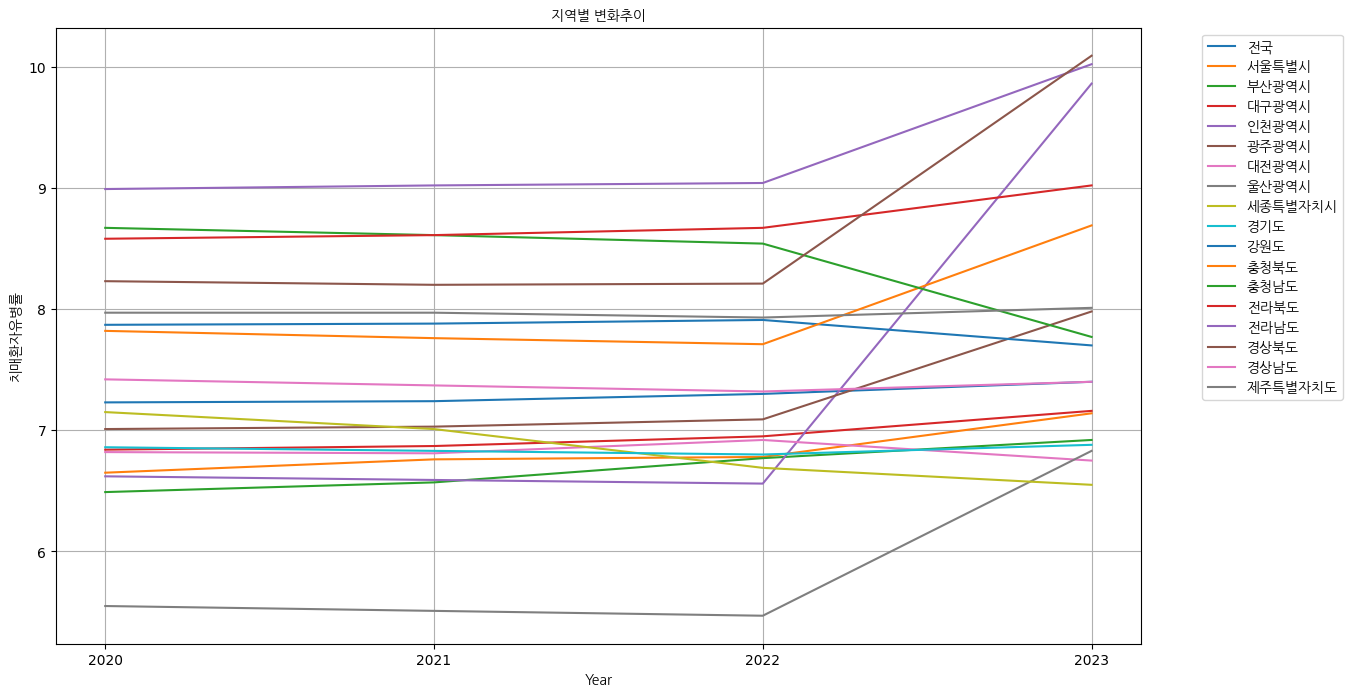

In [ ]:
# 시군구별로 꺾은선 그래프 생성
plt.figure(figsize=(14, 8))

for i, row in merged_df.iterrows():
    plt.plot(['2020', '2021', '2022', '2023'], row[1:], label=row['시군구'])

plt.xlabel('Year',fontproperties=font_prop)
plt.ylabel('치매환자유병률',fontproperties=font_prop)
plt.title('지역별 변화추이',fontproperties=font_prop)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_prop)
plt.grid(True)
plt.show()

####지역별 3년간 치매유병률 변화율

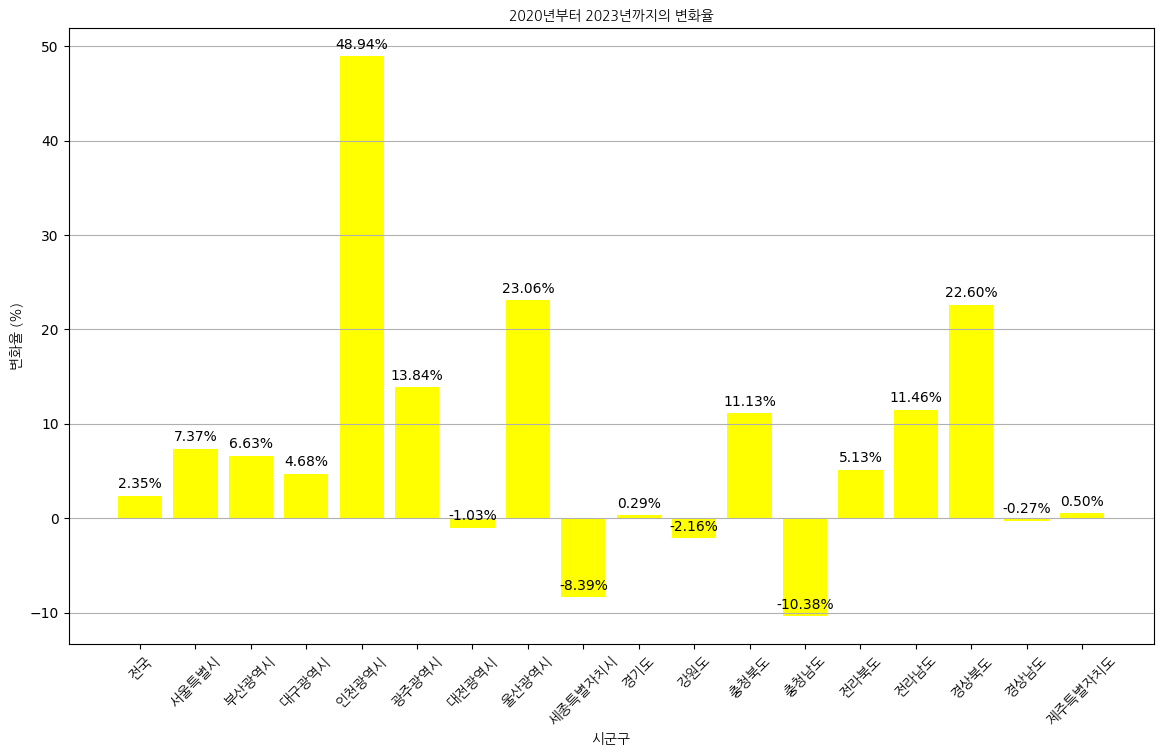

In [ ]:
merged_df['변화율'] = ((merged_df['2023'] - merged_df['2020']) / merged_df['2020']) * 100

# 변화율을 막대 그래프로 시각화
plt.figure(figsize=(14, 8))
plt.bar(merged_df['시군구'], merged_df['변화율'], color='yellow')

plt.xlabel('시군구',fontproperties=font_prop)
plt.ylabel('변화율 (%)',fontproperties=font_prop)
plt.title('2020년부터 2023년까지의 변화율',fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.grid(axis='y')

# 값 표시
for i, v in enumerate(merged_df['변화율']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

####치매비율시각화

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-23-4a318a93235b>:15: UserWarning: Gly

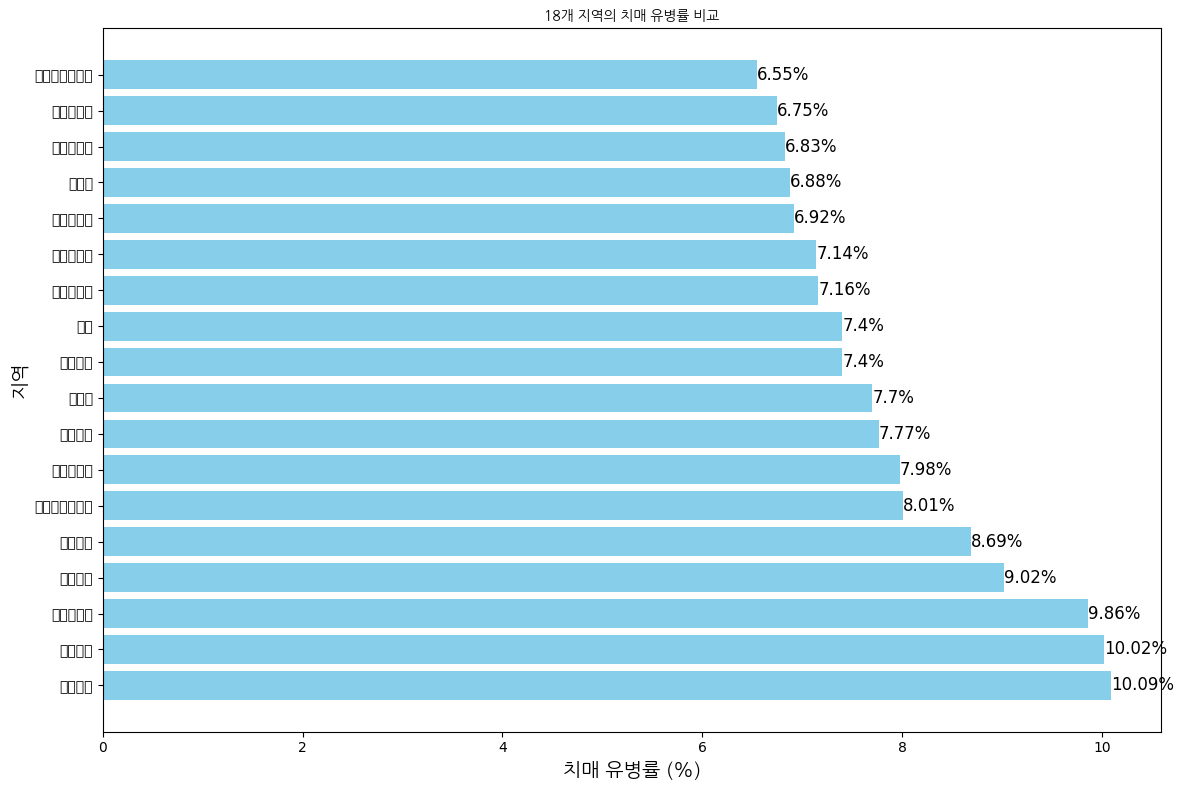

In [ ]:
plt.figure(figsize=(12, 8))
bars = plt.barh(df_2023_total['시도'], df_2023_total['치매환자유병률'], color='skyblue')

# 그래프에 레이블 추가
plt.xlabel('치매 유병률 (%)', fontsize=14,fontproperties=font_prop)
plt.ylabel('지역', fontsize=14,fontproperties=font_prop)
plt.title('18개 지역의 치매 유병률 비교', fontsize=16,fontproperties=font_prop)

# 값 레이블 추가
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}%', ha='left', va='center', fontsize=12)

# 그래프 보여주기
plt.tight_layout()
plt.show()

시 군 구별, 치매 유병률의 유의미한 차이가 존재한다.

#### 나이대별 중증도 비교 (전체, 2023)

In [ ]:
df_2023
df_severity =df_2023[(df_2023['시군구'] == '전국') & (df_2023['성별'] == '전체')]
df_severity

,연도,시도,시군구,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
20412,2023,전국,전국,전체,60~64세,4190183.5,25799.18,0.62,4489.06,10680.86,6630.39,3998.87,NaN,NaN,NaN,NaN,NaN,NaN,628366.56,15.00
20413,2023,전국,전국,전체,65~69세,3282269.5,45700.98,1.39,7951.97,18920.21,11745.15,7083.65,NaN,NaN,NaN,NaN,NaN,NaN,586163.95,17.86
20414,2023,전국,전국,전체,70~74세,2229036.5,86119.78,3.86,14984.84,35653.59,22132.78,13348.57,NaN,NaN,NaN,NaN,NaN,NaN,481897.33,21.62
20415,2023,전국,전국,전체,75~79세,1653502.5,194410.43,11.76,33827.41,80485.92,49963.48,30133.62,NaN,NaN,NaN,NaN,NaN,NaN,242442.67,14.66
20416,2023,전국,전국,전체,80~84세,1313968.5,274170.62,20.87,47705.69,113506.64,70461.85,42496.45,NaN,NaN,NaN,NaN,NaN,NaN,628684.66,47.85
20417,2023,전국,전국,전체,85세이상,983492.5,384199.16,39.06,66850.65,159058.45,98739.18,59550.87,NaN,NaN,NaN,NaN,NaN,NaN,219073.29,22.28
20418,2023,전국,전국,전체,60세이상,13652453.0,1010400.16,7.40,175809.63,418305.67,259672.84,156612.02,NaN,NaN,NaN,NaN,NaN,NaN,2786628.46,20.41
20419,2023,전국,전국,전체,65세이상,9462269.5,984600.98,10.41,171320.57,407624.80,253042.45,152613.15,NaN,NaN,NaN,NaN,NaN,NaN,2158261.90,22.81


In [ ]:
df_severity['최경도 환자 비율'] = df_severity['최경도 환자'] / df_severity['치매환자수']
df_severity['경도 환자 비율'] = df_severity['경도 환자'] / df_severity['치매환자수']
df_severity['중등도 환자 비율'] = df_severity['중등도 환자'] / df_severity['치매환자수']
df_severity['중증 환자 비율'] = df_severity['중증 환자'] / df_severity['치매환자수']

df_severity_ratio = df_severity[['연도','시도', '성별','연령별','최경도 환자 비율', '경도 환자 비율','중등도 환자 비율', '중증 환자 비율']]
df_severity_ratio

<ipython-input-65-1d0a026ecc29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_severity['최경도 환자 비율'] = df_severity['최경도 환자'] / df_severity['치매환자수']
<ipython-input-65-1d0a026ecc29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_severity['경도 환자 비율'] = df_severity['경도 환자'] / df_severity['치매환자수']
<ipython-input-65-1d0a026ecc29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,연도,시도,성별,연령별,최경도 환자 비율,경도 환자 비율,중등도 환자 비율,중증 환자 비율
20412,2023,전국,전체,60~64세,0.174,0.414,0.257,0.155
20413,2023,전국,전체,65~69세,0.174,0.414,0.257,0.155
20414,2023,전국,전체,70~74세,0.174,0.414,0.257,0.155
20415,2023,전국,전체,75~79세,0.174,0.414,0.257,0.155
20416,2023,전국,전체,80~84세,0.174,0.414,0.257,0.155
20417,2023,전국,전체,85세이상,0.174,0.414,0.257,0.155
20418,2023,전국,전체,60세이상,0.174,0.414,0.257,0.155
20419,2023,전국,전체,65세이상,0.174,0.414,0.257,0.155


오잉.. 왜 똑같지..!? 데이터셋에서 직접 계산기로 나눠봤더니 비율 일정한 것 확인..

#### 나이대별 치매환자 중 알츠하이머 환자수 비율(전체, 2020)

In [ ]:
df_2020 = df[df['연도']== 2020]
df_2020

,연도,시도,시군구,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2020,전국,전국,전체,60~64세,3804709.5,23350.26,0.61,4062.95,9667.01,6001.02,3619.29,0.00,0.00,23350.26,0.61,0.00,0.00,568975.71,14.95
1,2020,전국,전국,전체,65~69세,2635592.0,36620.52,1.39,6371.97,15160.90,9411.47,5676.18,34204.14,1.30,0.00,0.00,2416.38,0.09,472079.05,17.91
2,2020,전국,전국,전체,70~74세,2000708.5,77236.58,3.86,13439.16,31975.94,19849.80,11971.67,74101.52,3.70,1868.56,0.09,1279.71,0.06,432263.10,21.61
3,2020,전국,전국,전체,75~79세,1602662.5,189626.57,11.83,32995.02,78505.40,48734.03,29392.12,79081.82,4.93,36835.05,2.30,73617.65,4.59,238681.35,14.89
4,2020,전국,전국,전체,80~84세,1110911.5,232892.50,20.96,40523.30,96417.50,59853.37,36098.34,182257.11,16.41,8518.04,0.77,42047.60,3.78,530714.37,47.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,2020,제주특별자치도,서귀포시,여,75~79세,3922.5,539.74,13.76,93.91,223.45,138.71,83.66,250.65,6.39,32.56,0.83,256.14,6.53,818.15,20.86
6668,2020,제주특별자치도,서귀포시,여,80~84세,3211.0,746.88,23.26,129.96,309.21,191.95,115.77,675.92,21.05,11.24,0.35,59.40,1.85,1478.93,46.06
6669,2020,제주특별자치도,서귀포시,여,85세이상,3222.0,1062.29,32.97,184.84,439.79,273.01,164.65,911.50,28.29,73.46,2.28,77.01,2.39,749.16,23.25
6670,2020,제주특별자치도,서귀포시,여,60세이상,26639.0,2543.02,9.55,442.49,1052.81,653.56,394.17,2019.75,7.58,124.86,0.47,397.81,1.49,5447.35,20.45


In [ ]:
df_ah =df_2020[(df_2020['시군구'] == '전국') & (df_2020['성별'] == '전체')]
df_ah['알츠하이머 환자 비율'] = df_ah['알츠하이머 환자수'] / df_ah['치매환자수']

df_ah_ratio = df_ah[['연도','시도', '성별','연령별','알츠하이머 환자 비율']]
df_ah_ratio

#나이대별로 치매 치료법이 달라야함



<ipython-input-61-7c644b24d29a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ah['알츠하이머 환자 비율'] = df_ah['알츠하이머 환자수'] / df_ah['치매환자수']


,연도,시도,성별,연령별,알츠하이머 환자 비율
0,2020,전국,전체,60~64세,0.000000
1,2020,전국,전체,65~69세,0.934016
2,2020,전국,전체,70~74세,0.959410
3,2020,전국,전체,75~79세,0.417040
4,2020,전국,전체,80~84세,0.782580
5,2020,전국,전체,85세이상,0.871417
6,2020,전국,전체,60세이상,0.734642
7,2020,전국,전체,65세이상,0.755059


75-79세의 경우 치매의 요인 중 알츠하이머 외에 다른 요인들이 비이상적으로 많음...!
연령이 증가하면 알츠하이머 외에 다른 요인이 치매의 요인이 되는 비율이 증가

In [ ]:
#2022년 치매노인 인구수
df_2022 = df[df['연도']== 2022]
df_2022_치매노인수 = df_2022[df_2022['연령별'] == '65세이상']
df_2022_치매노인수.to_csv('df_2022_치매노인수.csv', index=False)